In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import plotly.express as px
from sklearn.metrics import ndcg_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ratings_2018.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df.shape

(100836, 5)

In [ ]:
df['movieId'].nunique()

9724

In [ ]:
df['userId'].nunique()

610

In [ ]:
df['time'] = pd.to_datetime(df['timestamp'],unit='s')

In [ ]:
rating_df = df[['userId','movieId','rating']].pivot_table(index='userId',columns='movieId',values='rating')
rating_df

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


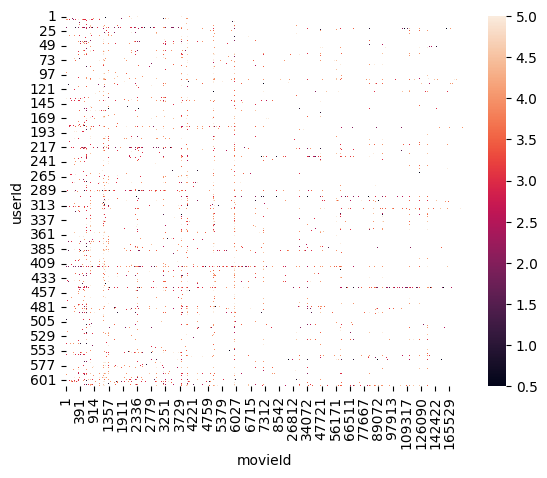

In [ ]:
sns.heatmap(rating_df);

In [ ]:
# most popular movies in terms of interaction counts
interaction_counts = rating_df.apply(lambda x: sum(x.notnull()), axis=0).rename('counts').sort_values(ascending=False)
interaction_counts

,counts
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
4093,1
4089,1
58351,1


In [ ]:
avg_ratings = rating_df.mean(axis=0).rename('avg_rating').sort_values(ascending=False)
avg_ratings

,avg_rating
movieId,
88448,5.0
100556,5.0
143031,5.0
143511,5.0
143559,5.0
...,...
157172,0.5
85334,0.5
53453,0.5


In [ ]:
# treemap of counts and avg_ratings by movies
movie_stats = pd.merge(interaction_counts, avg_ratings, left_index=True, right_index=True)
movie_stats

,counts,avg_rating
movieId,,
356,329,4.164134
318,317,4.429022
296,307,4.197068
593,279,4.161290
2571,278,4.192446
...,...,...
4093,1,1.500000
4089,1,2.000000
58351,1,4.000000


In [ ]:
fig = px.treemap(movie_stats.reset_index(),
                 path=[px.Constant("All Movies"),'movieId'],
                 values='counts',
                 color='avg_rating',)

fig.update_layout(title='All movies statistics',margin = dict(t=50, l=25, r=25, b=25))
fig.show();

In [ ]:
# most active users in terms of interaction counts
active_counts = rating_df.transpose().apply(lambda x: sum(x.notnull()), axis=0).rename('active_counts').sort_values(ascending=False)
active_counts

,active_counts
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
569,20
320,20


In [ ]:
user_ratings = rating_df.transpose().mean(axis=0).rename('user_rating').sort_values(ascending=False)
user_ratings

,user_rating
userId,
53,5.000000
251,4.869565
515,4.846154
25,4.807692
30,4.735294
...,...
567,2.245455
153,2.217877
508,2.145833


In [ ]:
user_stats = pd.merge(active_counts, user_ratings, left_index=True, right_index=True)
user_stats

,active_counts,user_rating
userId,,
414,2698,3.391957
599,2478,2.642050
474,2108,3.398956
448,1864,2.847371
274,1346,3.235884
...,...,...
442,20,1.275000
569,20,4.000000
320,20,3.525000


In [ ]:
fig = px.treemap(user_stats.reset_index(),
                 path=[px.Constant("All Users"),'userId'],
                 values='active_counts',
                 color='user_rating',)

fig.update_layout(title='All user statistics',margin = dict(t=50, l=25, r=25, b=25))
fig.show();

In [ ]:
# avg ratings + counts by year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df.drop('timestamp',axis=1,inplace=True)

In [ ]:
monthly_stats = pd.merge(df.groupby(['year','month'])['rating'].mean().rename('avg'),df.groupby(['year','month']).size().rename('count'),left_index=True, right_index=True)
monthly_stats

avg  count
year month                 
1996 3      3.982759     58
     4      3.739394    165
     5      3.514423    832
     6      3.540204    883
     7      3.695297    489
...              ...    ...
2018 5      2.951630    951
     6      3.979714    419
     7      4.010239    293
     8      3.557762    831
     9      3.568709    604

[267 rows x 2 columns]

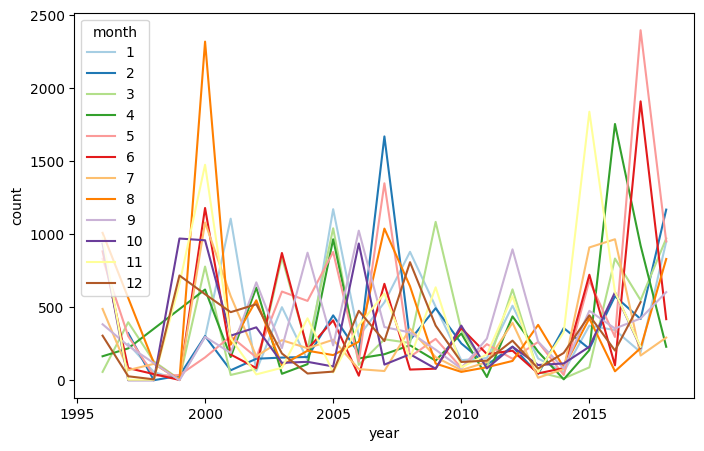

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(monthly_stats.reset_index(),x='year',y='count',hue='month',palette='Paired');

In [ ]:
yearly_stats = pd.merge(df.groupby('year')['rating'].mean().rename('avg'), df.groupby('year').size().rename('count'), left_index=True, right_index=True)
yearly_stats

,avg,count
year,,
1996,3.535927,6040
1997,3.727557,1916
1998,3.435897,507
1999,3.772448,2439
2000,3.392506,10061
2001,3.512239,3922
2002,3.606958,3478
2003,3.499377,4014
2004,3.506099,3279


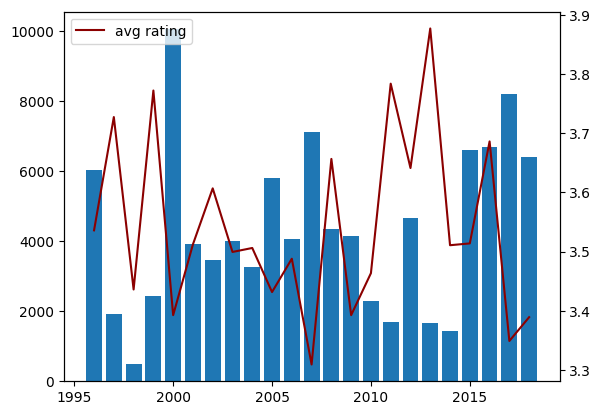

In [ ]:
fig, ax = plt.subplots()
ax.bar(yearly_stats.index,yearly_stats['count'],label='# rating')
ax1 = ax.twinx()
ax1.plot(yearly_stats['avg'],color='darkred',label='avg rating')
plt.legend();

In [ ]:
# train test split: put aside the last interaction for each user for test, use the remainder in train
test_data = df.sort_values(by=['userId','time'],ascending=True).groupby('userId').apply(lambda x: x.sort_values(by='time',ascending=False).iloc[0]).reset_index(drop=True)
test_data

,userId,movieId,rating,time,year,month
0,1,2492,4.0,2000-08-08 07:27:42,2000,8
1,2,80489,4.5,2015-10-24 19:35:40,2015,10
2,3,2424,0.5,2011-05-27 02:44:53,2011,5
3,4,4246,4.0,2001-12-05 17:49:02,2001,12
4,5,474,4.0,1996-11-08 06:42:17,1996,11
...,...,...,...,...,...,...
605,606,2355,3.0,2013-05-13 15:56:17,2013,5
606,607,4015,1.0,2001-08-15 03:49:47,2001,8
607,608,52245,3.0,2007-09-12 02:25:17,2007,9
608,609,1161,4.0,1996-11-05 19:11:20,1996,11


In [ ]:
test_data.to_csv('/content/drive/MyDrive/recommender_test.csv')

In [ ]:
merged = df.merge(test_data,how='left',indicator=True)
train_data = merged[merged['_merge'] == 'left_only'].drop('_merge',axis=1)

In [ ]:
train_data

,userId,movieId,rating,time,year,month
0,1,1,4.0,2000-07-30 18:45:03,2000,7
1,1,3,4.0,2000-07-30 18:20:47,2000,7
2,1,6,4.0,2000-07-30 18:37:04,2000,7
3,1,47,5.0,2000-07-30 19:03:35,2000,7
4,1,50,5.0,2000-07-30 18:48:51,2000,7
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017,5
100832,610,168248,5.0,2017-05-03 22:21:31,2017,5
100833,610,168250,5.0,2017-05-08 19:50:47,2017,5
100834,610,168252,5.0,2017-05-03 21:19:12,2017,5


In [ ]:
train_data.to_csv('/content/drive/MyDrive/recommender_train.csv',index=None)

NDCG scores are interesting, compute manually first then cross-reference with sklearn. For our case, follow the formula in *TriRank: Review-aware Explainable Recommendation
by Modeling Aspects*

- Formula:
$$
NDCG@K = Z_k∑_{i=1}^{K}\frac{2^{r_i} - 1}{log_2(i + 1)}
$$

- Ideal DCG will be where the target item is ranked first, followed by K - 1 non-relevant items


Explain that the baseline here might be different from the "typical"

For item-based collaborative filtering

- compute cosine similarity scores
- for each item i, prediction of rating i for user u = weighted average of target item based on these K most similar items
- filter the top K and see if target is in

For userbased collaborative filtering

*   compute sim scores between users
*   for each item i, prediction of rating i for user u is weighted average based on the ratings given by top K most similar users. But ofc we only consider those users with non null ratings for movie i (filter out null users first then weighted average).


For matrix factorization:

*   Factor the rating matrix into 2 latent user and item matrices in D dimension
*   Visualize user and item latent vectors in the same space using the first 2 dimensions
* from surprise import SVD, this immediately gives predictions for all missing values in the original rating matrix
* then for user u, filter the top k element by predicted ratings
* evaluate

For neural collaborative filtering


*   check if there are existing implementations: there are in the book
*   negative sampling ratio? random sample 100 and target i, rank
* visualize training loss, y is loss, x is iterations (epochs), hue is sampling ratio.

For sequential transformer recommender

* same as decoder, but with padding
* how to apply negative sampling in the last layer?
* visualize heatmap of attention weights in each layer
* attention between items?

Last plot/table comparing all models metrics



